In [ ]:
# !pip install fbprophet

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd

## 데이터 로드

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/data/철구_stat.csv'
df = pd.read_csv(path, header=0)
print(df.shape)
print(df.head())

(439, 6)
   searchDate  dailyViewCount  ...  favorablePercent  activePercent
0  2019-12-10          116197  ...                85             34
1  2019-12-11          180614  ...                85             40
2  2019-12-12          159447  ...                85             39
3  2019-12-13          153072  ...                85             38
4  2019-12-14          142644  ...                85             37

[5 rows x 6 columns]


## 불필요한 컬럼 삭제(단변량 예측)

In [ ]:
del df['dailyViewCount']
del df['videoCount']
del df['favorablePercent']
del df['activePercent']

In [ ]:
# 데이터의 마지막 날짜와 그 다음 날짜를 저장
lastday = df['searchDate'][len(df)-1]
nextday = str(pd.date_range(lastday, periods=2)[1])[:10]
print("마지막 날짜 : {}, 예측 시작 날짜 : {}".format(lastday, nextday))

마지막 날짜 : 2021-02-21, 예측 시작 날짜 : 2021-02-22


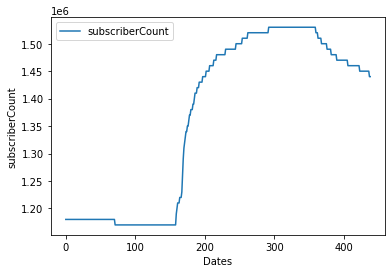

In [ ]:
df.plot()
plt.ylabel("subscriberCount")
plt.xlabel("Dates")
plt.show()

## 모델에 맞게 데이터 전처리

In [ ]:
# 컬럼명 변경
df.columns = ['ds', 'y']
# 데이터 타입 변경
df['ds']= pd.to_datetime(df['ds'])

In [ ]:
preday = 30

In [ ]:
fast_10day = str(pd.date_range(df['ds'][len(df)-preday], periods=preday)[0])[:10]

In [ ]:
y_true = df['y'][-preday:].values

# train set 마지막 preday일 날짜 예측 검증
last_10day = list()
for i in range(preday):
    last_10day.append(str(pd.date_range(fast_10day, periods=preday)[i])[:10])
last_10day = pd.DataFrame(last_10day, columns = ['ds'])
last_10day['ds']= pd.to_datetime(last_10day['ds'])

In [ ]:
from fbprophet import Prophet

# 모델 생성
model = Prophet()
# 모델 학습
model.fit(df)

forecast = model.predict(last_10day)
y_pred = forecast['yhat'].values

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


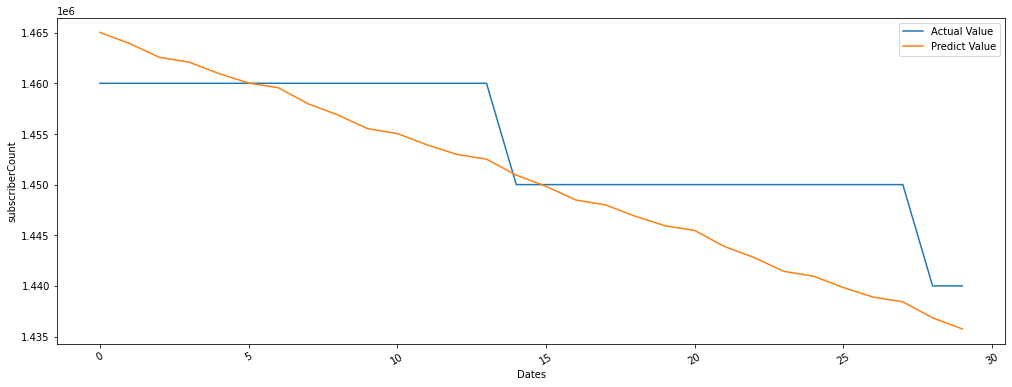

In [ ]:
plt.figure(figsize=(17,6))
plt.plot(y_true, label="Actual Value")
plt.plot(y_pred, label="Predict Value")
plt.ylabel("subscriberCount")
plt.xlabel("Dates")
plt.xticks(rotation = 30)
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_true, y_pred)
print('prophet - MAE 값 : %.3f' % mae)

prophet - MAE 값 : 4590.207


## 예측할 일 수 입력

In [ ]:
# 예측할 날짜 일 수
predict_day = 9
# 예측 날짜 문자열 리스트 생성
pred_date = list()
for i in range(predict_day):
    pred_date.append(str(pd.date_range(nextday, periods=predict_day)[i])[:10])

# 날짜 리스트를 데이터 프레임 화
pred_date = pd.DataFrame(pred_date, columns = ['ds'])
# 문자열을 날짜 데이터 형식으로 변환
pred_date['ds']= pd.to_datetime(pred_date['ds'])

## 시각화

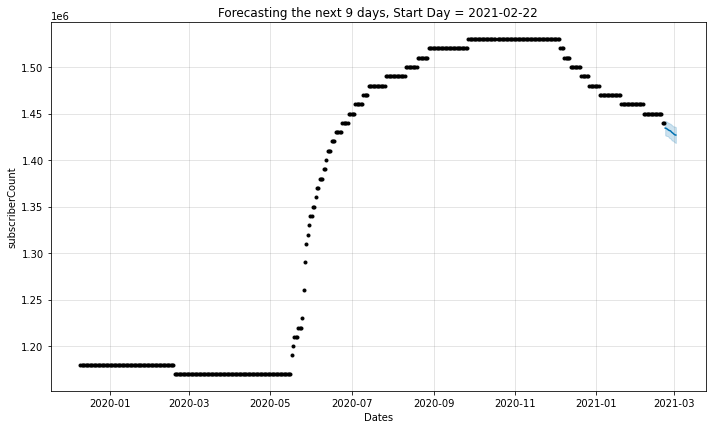

In [ ]:
# 미래 예측
forecast = model.predict(pred_date)
model.plot(forecast)
plt.ylabel("subscriberCount")
plt.xlabel("Dates")
plt.title(f"Forecasting the next {predict_day} days, Start Day = {nextday}")
plt.show()

In [ ]:
# 기존 데이터 마지막 날의 다음 날을 구함(= 미래 예측 데이터의 시작 날짜)
next = str(pd.date_range(df['ds'][len(df)-1], periods=2)[1])[:10]

step = 9
# 예측 데이터 날짜 리스트 생성
forecast_date = []
for i in range(step):
  forecast_date.append(str(pd.date_range(next, periods=step)[i])[:10])

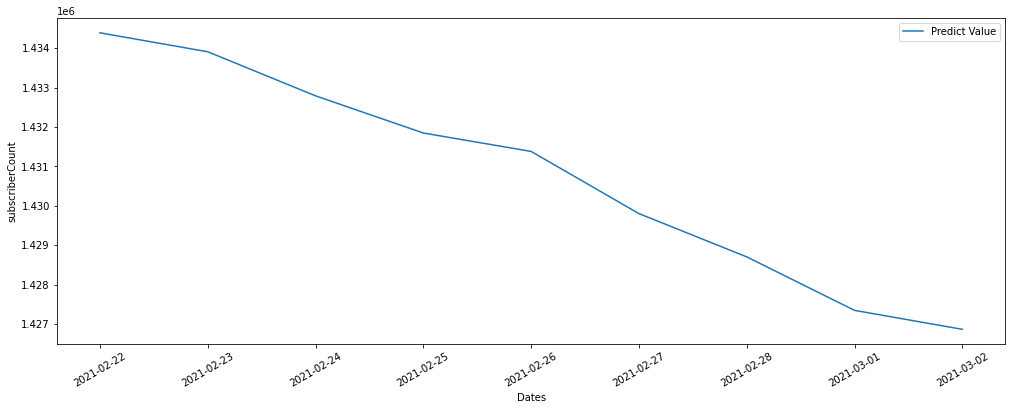

In [ ]:
plt.figure(figsize=(17,6))
plt.plot(forecast['yhat'], label="Predict Value")
plt.ylabel("subscriberCount")
plt.xlabel("Dates")
plt.xticks(list(range(step)), forecast_date, rotation = 30)
plt.legend()
plt.show()

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-02-22,1.434852e+06,1.426669e+06,1.442189e+06,1.434852e+06,1.434852e+06,-460.512208,-460.512208,-460.512208,-460.512208,-460.512208,-460.512208,0.0,0.0,0.0,1.434391e+06
1,2021-02-23,1.433845e+06,1.425949e+06,1.441493e+06,1.433845e+06,1.433845e+06,64.619763,64.619763,64.619763,64.619763,64.619763,64.619763,0.0,0.0,0.0,1.433910e+06
2,2021-02-24,1.432839e+06,1.425818e+06,1.440433e+06,1.432839e+06,1.432839e+06,-47.440631,-47.440631,-47.440631,-47.440631,-47.440631,-47.440631,0.0,0.0,0.0,1.432791e+06
3,2021-02-25,1.431833e+06,1.423882e+06,1.439605e+06,1.431811e+06,1.431865e+06,15.439530,15.439530,15.439530,15.439530,15.439530,15.439530,0.0,0.0,0.0,1.431848e+06
4,2021-02-26,1.430826e+06,1.423263e+06,1.438939e+06,1.430508e+06,1.431177e+06,554.464421,554.464421,554.464421,554.464421,554.464421,554.464421,0.0,0.0,0.0,1.431381e+06
5,2021-02-27,1.429820e+06,1.421130e+06,1.437705e+06,1.429080e+06,1.430581e+06,-17.515058,-17.515058,-17.515058,-17.515058,-17.515058,-17.515058,0.0,0.0,0.0,1.429802e+06
6,2021-02-28,1.428814e+06,1.420686e+06,1.436315e+06,1.427247e+06,1.430080e+06,-109.055817,-109.055817,-109.055817,-109.055817,-109.055817,-109.055817,0.0,0.0,0.0,1.428704e+06
7,2021-03-01,1.427807e+06,1.419159e+06,1.436154e+06,1.425695e+06,1.429769e+06,-460.512208,-460.512208,-460.512208,-460.512208,-460.512208,-460.512208,0.0,0.0,0.0,1.427347e+06
8,2021-03-02,1.426801e+06,1.418321e+06,1.435461e+06,1.424133e+06,1.429616e+06,64.619763,64.619763,64.619763,64.619763,64.619763,64.619763,0.0,0.0,0.0,1.426866e+06


In [ ]:
# yhat은 미래 예측 값, yhat_lower은 예측 하한값, yhat_upper은 예측 상한값
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

          ds          yhat    yhat_lower    yhat_upper
0 2021-02-22  1.434391e+06  1.426669e+06  1.442189e+06
1 2021-02-23  1.433910e+06  1.425949e+06  1.441493e+06
2 2021-02-24  1.432791e+06  1.425818e+06  1.440433e+06
3 2021-02-25  1.431848e+06  1.423882e+06  1.439605e+06
4 2021-02-26  1.431381e+06  1.423263e+06  1.438939e+06
5 2021-02-27  1.429802e+06  1.421130e+06  1.437705e+06
6 2021-02-28  1.428704e+06  1.420686e+06  1.436315e+06
7 2021-03-01  1.427347e+06  1.419159e+06  1.436154e+06
8 2021-03-02  1.426866e+06  1.418321e+06  1.435461e+06


In [ ]:
arr = forecast['yhat']

In [ ]:
int(arr[0])

1434391

In [ ]:
for i in arr :
  print(int(i))

1434391
1433909
1432791
1431847
1431380
1429802
1428704
1427346
1426865
